In [1]:
import sys
sys.path.append('..')

from uncertain.models import ImplicitMF, TwoWayMF
from uncertain.loss import BPR, ABPR, GPR
from utils.data import MovieLens
from utils.training import train_test
from utils.evaluation import test_recommendations

ML = MovieLens(batch_size=512)
ML.prepare_data()

MovieLens data prepared: 6016 users, 3533 item.
551106 Train interactions, 12032 validation and test interactions.


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type      | Params
----------------------------------------------
0 | user_embeddings | Embedding | 60.2 K
1 | item_embeddings | Embedding | 35.3 K
----------------------------------------------
95.5 K    Trainable params
0         Non-trainable params
95.5 K    Total params
0.382     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

({'Precision': 0.014394946808510743, 'Recall': 0.0359873670212766, 'NDCG': 0.10703863850952006, 'AUC': 0.892303216156893}, <Figure size 432x288 with 2 Axes>)


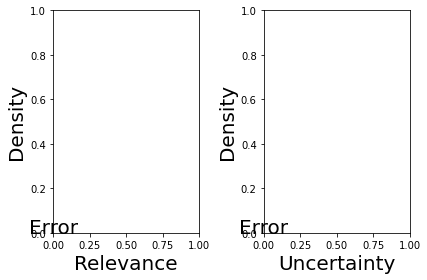

In [2]:
model = ImplicitMF(ML.n_user, ML.n_item, embedding_dim=10, lr=1e-3, weight_decay=0, loss=BPR(log_scale=True))
print(train_test(model, ML, max_k=5))

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name            | Type       | Params
-----------------------------------------------
0 | relevance       | ImplicitMF | 95.5 K
1 | user_embeddings | Embedding  | 180 K 
2 | item_embeddings | Embedding  | 105 K 
3 | var_activation  | Softplus   | 0     
-----------------------------------------------
381 K     Trainable params
0         Non-trainable params
381 K     Total params
1.528     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

({'Precision': 0.014428191489361801, 'Recall': 0.036070478723404256, 'NDCG': 0.10845049035408012, 'AUC': 0.8952496919382714, 'RRI': 0.028602890160480707}, <Figure size 432x288 with 2 Axes>)


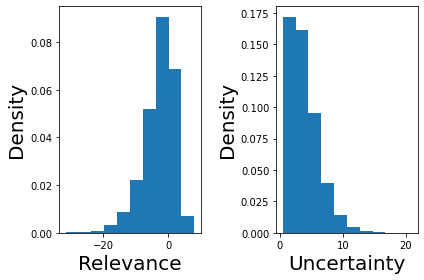

In [7]:
model2 = TwoWayMF(model, embedding_dim=30, lr=1e-3, weight_decay=0, loss=GPR(log_scale=True))
print(train_test(model2, ML, max_k=5))